In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.size

118260

In [6]:
df_train.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [7]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [321]:
continuous_variables = list(df_train.describe().keys())
continuous_variables.remove('OverallQual')
continuous_variables.remove('OverallCond')
continuous_variables.remove('Id')

In [322]:
categorical_variables = list(set(df_train.columns)-set(continuous_variables))
categorical_variables.remove('Id')

In [323]:
print('categorical_variables\t', len(categorical_variables), '\continuous_variables\t', len(continuous_variables))

categorical_variables	 45 \continuous_variables	 35


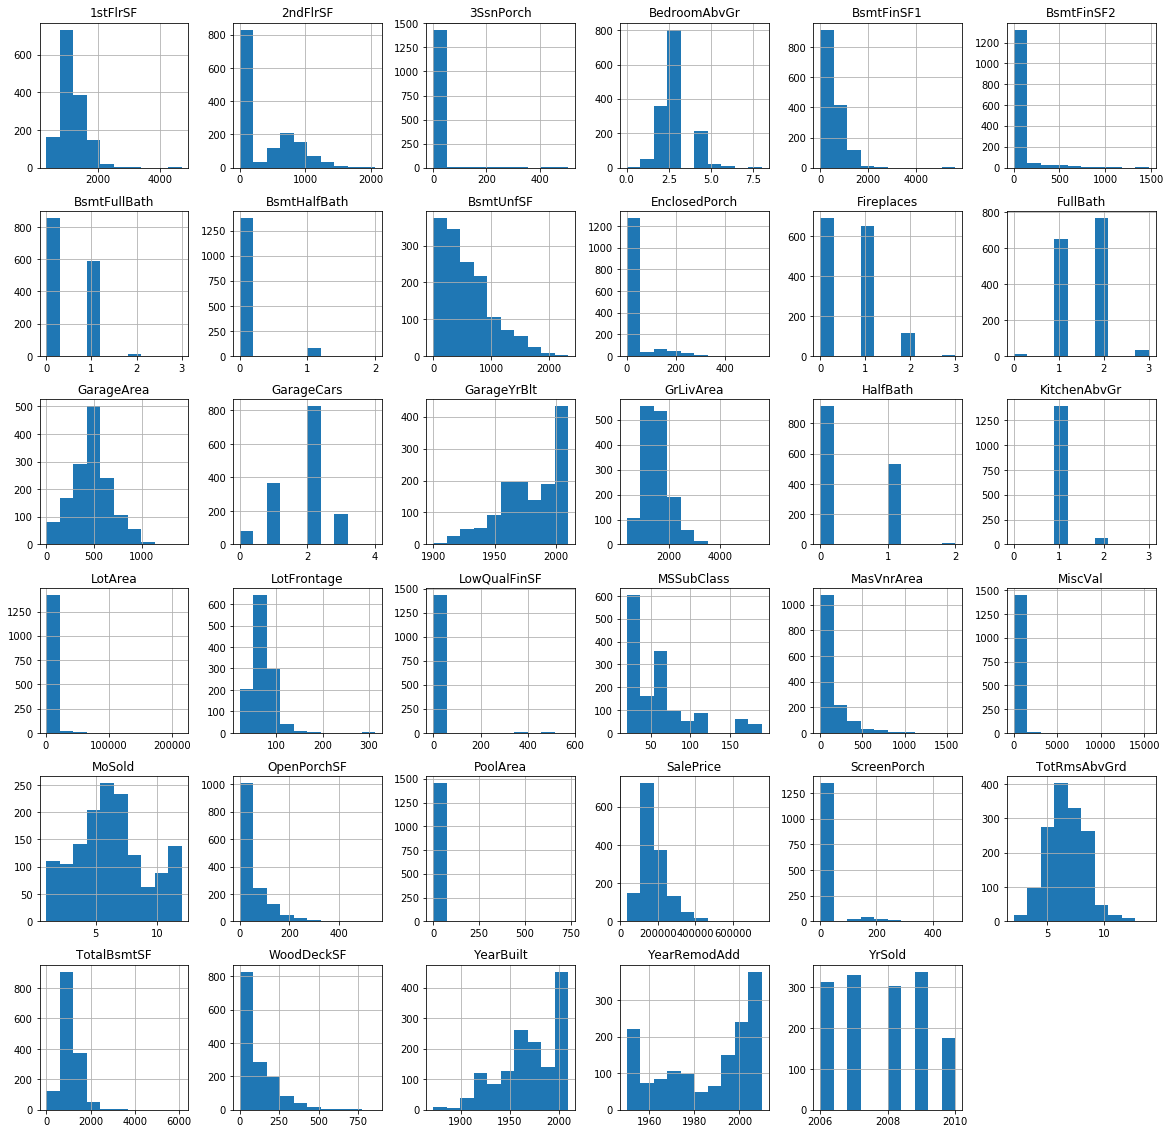

In [324]:
#continuous_variables visualization
df_train[continuous_variables].hist(figsize = (20,20))
plt.show()

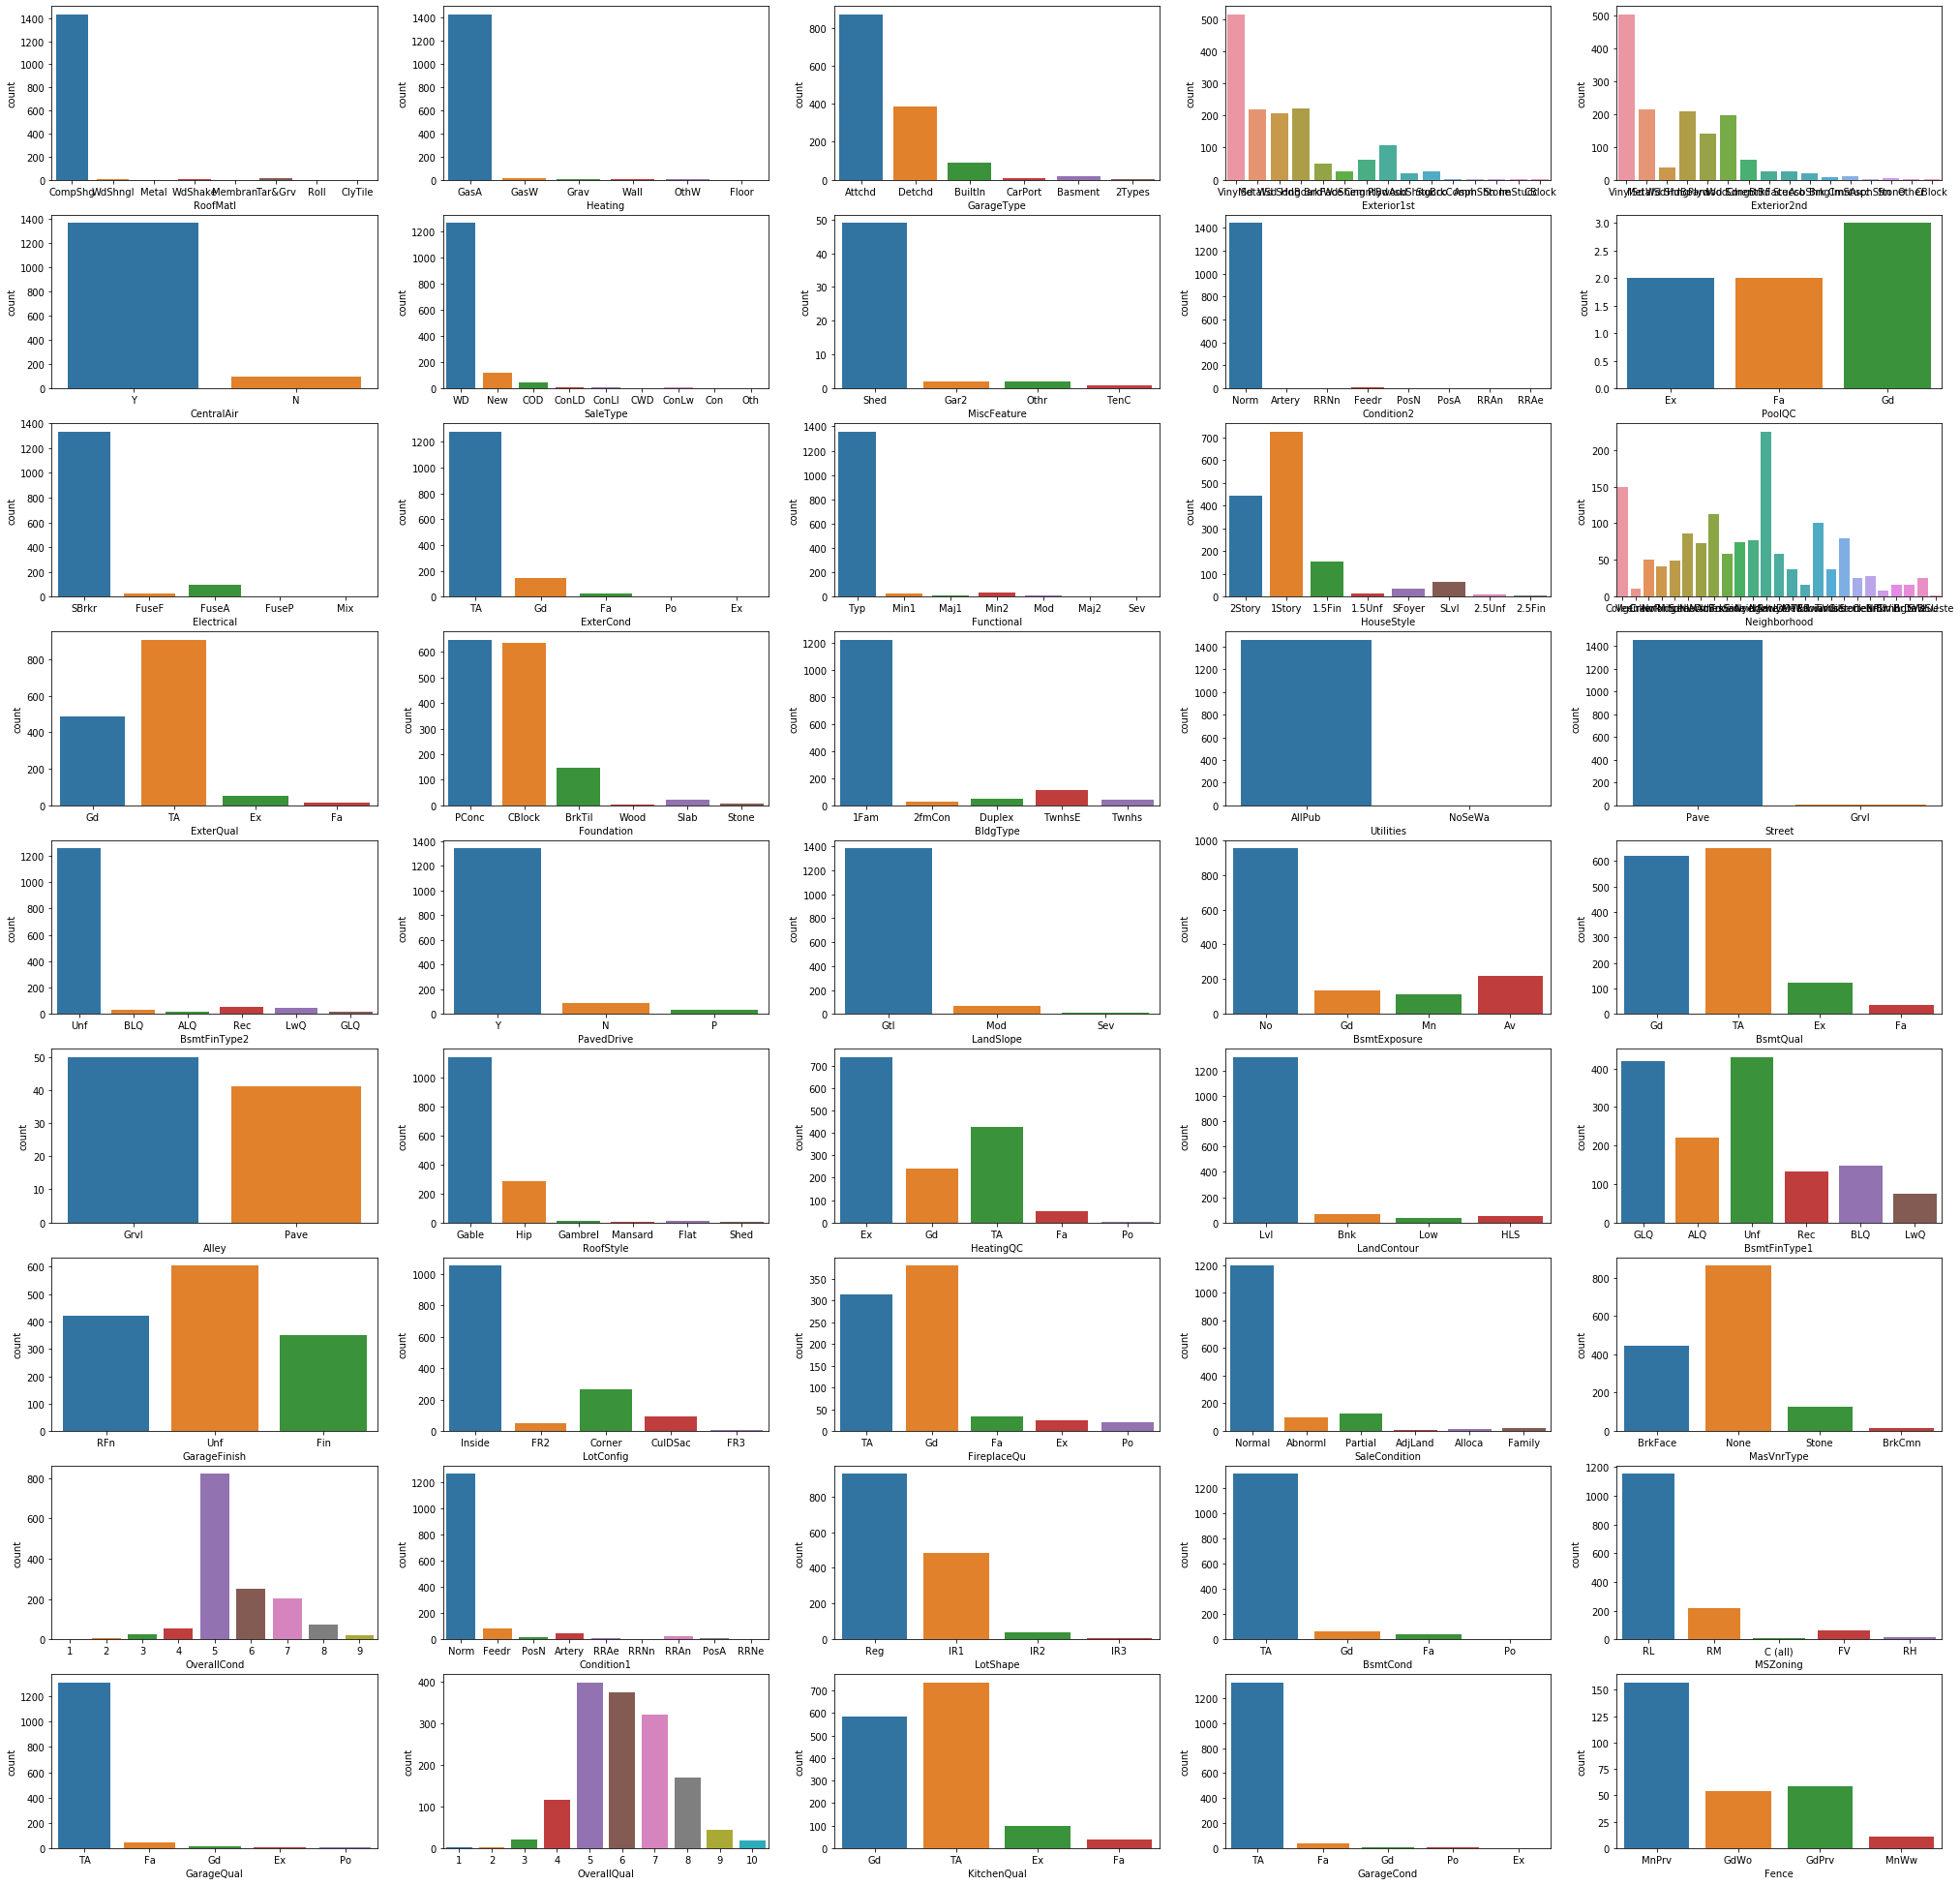

In [325]:
#categorical_variables visualization
plt.figure(figsize=(35,35))
for i in categorical_variables:
    plt.subplot(9, 5, categorical_variables.index(i)+1)
    sns.countplot(df_train[i])
plt.show()

In [486]:
corr_continuous_variables = df_train[continuous_variables].corr()
corr_continuous_variables

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.027850,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


In [487]:
col1, col2 = [], []
for i in np.arange(0, len(corr_continuous_variables.columns)):
    col1.append(corr_continuous_variables.columns[i])
    col2.append(list((corr_continuous_variables.iloc[:,i].nlargest(6)[1:]).keys() + '__' + list(map(str,(corr_continuous_variables.iloc[:,i].nlargest(6)[1:]).values))))

In [488]:
corr_continuous_strong=pd.concat([pd.DataFrame(col1,columns=['col']),pd.DataFrame(col2,columns=['corr1','corr2','corr3','corr4','corr5'])],axis=1)
corr_continuous_strong

,col,corr1,corr2,corr3,corr4,corr5
0,MSSubClass,2ndFlrSF__0.30788572075985965,KitchenAbvGr__0.281721040264881,HalfBath__0.17735438864391526,FullBath__0.13160822241028183,GarageYrBlt__0.08507186950664651
1,LotFrontage,1stFlrSF__0.4571810019946558,LotArea__0.4260950187718087,GrLivArea__0.40279741408532066,TotalBsmtSF__0.39207457637917215,TotRmsAbvGrd__0.35209594766022567
2,LotArea,LotFrontage__0.4260950187718087,1stFlrSF__0.29947457850776354,Fireplaces__0.2713640096245405,SalePrice__0.2638433538714063,GrLivArea__0.26311616716714836
3,YearBuilt,GarageYrBlt__0.8256674841743434,YearRemodAdd__0.5928549763436497,GarageCars__0.5378500917111045,SalePrice__0.5228973328794967,GarageArea__0.4789538198934912
4,YearRemodAdd,GarageYrBlt__0.6422767797035414,YearBuilt__0.5928549763436497,SalePrice__0.5071009671113867,FullBath__0.43904648387234635,GarageCars__0.4206221549432185
5,MasVnrArea,SalePrice__0.4774930470957107,GrLivArea__0.3908566397384352,GarageArea__0.37306648160023304,GarageCars__0.3642036400698638,TotalBsmtSF__0.3639362217744695
6,BsmtFinSF1,BsmtFullBath__0.6492117535742737,TotalBsmtSF__0.5223960519923907,1stFlrSF__0.4458626560920095,SalePrice__0.38641980624215627,GarageArea__0.29697038534451464
7,BsmtFinSF2,BsmtFullBath__0.15867806078170232,LotArea__0.11116974549624932,TotalBsmtSF__0.10480953760636849,1stFlrSF__0.09711744845667107,ScreenPorch__0.08887125137339077
8,BsmtUnfSF,TotalBsmtSF__0.41535960518158943,1stFlrSF__0.3179874383527257,FullBath__0.2888860554869107,TotRmsAbvGrd__0.25064706137624776,GrLivArea__0.24025726834993516
9,TotalBsmtSF,1stFlrSF__0.8195299750050355,SalePrice__0.6135805515591944,BsmtFinSF1__0.5223960519923907,GarageArea__0.48666546377379655,GrLivArea__0.4548682025479028


C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


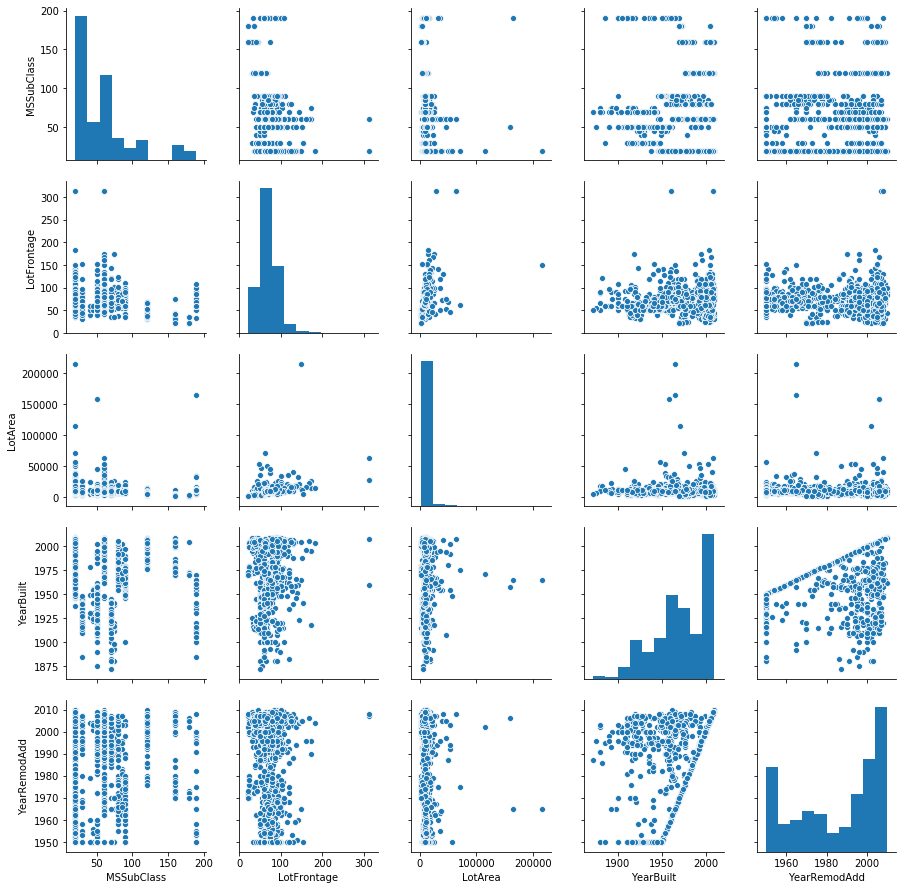

In [411]:
sns.pairplot(df_train[continuous_variables[:5]])
plt.show()

In [628]:
cross_category = pd.crosstab(index = df_train.LotShape, columns = df_train.LotConfig)
cross_category

LotConfig,Corner,CulDSac,FR2,FR3,Inside
LotShape,,,,,
IR1,107,77,15,1,284
IR2,8,14,5,0,14
IR3,2,2,0,0,6
Reg,146,1,27,3,748


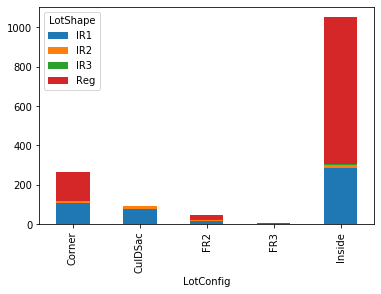

In [606]:
cross_category.T.plot(kind='bar', stacked=True)
plt.show()

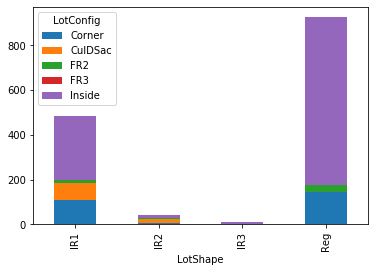

In [607]:
cross_category.plot(kind='bar', stacked=True)
plt.show()

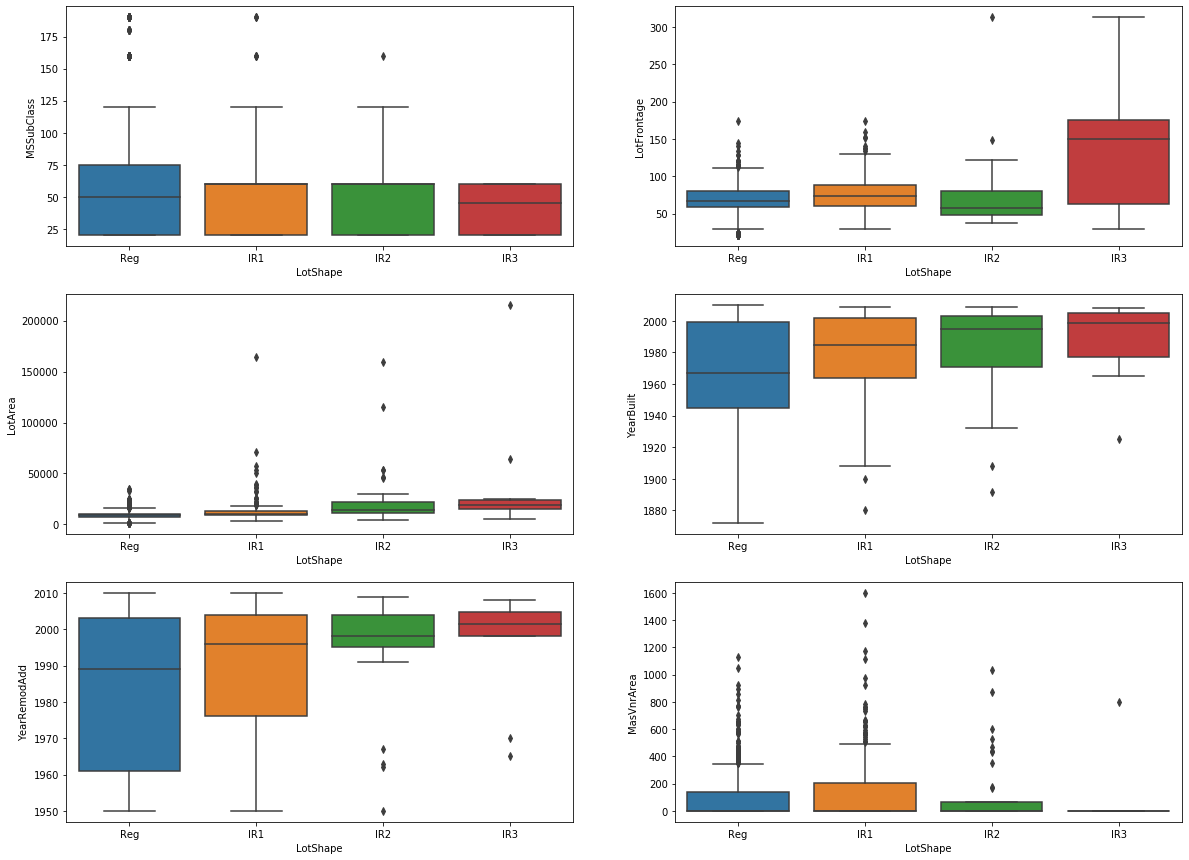

In [630]:
plt.figure(figsize=(20,15))
for cat in continuous_variables[:6]:
    plt.subplot(3,2,continuous_variables.index(cat)+1)
    sns.boxplot(x = df_train.LotShape, y = df_train[cat])
plt.show()

In [633]:
import category_encoders as en
bin_encoding = en.BinaryEncoder()
bin_encoding.fit_transform(df_train.Condition1).head()

,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
